# Task # 4 - To Explore Decision Tree Algorithm

## Create and visualize Decision Tree Classifier

#### Importing libraries in Python

In [2]:
import pandas as pd
import numpy as np
import sklearn.datasets as datasets
from sklearn import tree
import matplotlib.pyplot as plt

#### Loading dataset

In [3]:
iris = datasets.load_iris()

#### Inspecting dataset

In [4]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

#### Inspecting target

In [5]:
iris.target[:5]

array([0, 0, 0, 0, 0])

#### Inspecting feature names

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Creating a dataframe by concatinating 'data', 'target' and 'feature names'

In [7]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Features and Target selection
* Features(x) = 'sepal length', 'sepal width','petal length','petal width'
* Target(y) = 'species'

In [9]:
x=iris.data
y=iris.target

#### Splitting the dataset for training and testing

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

### Decision Tree Classifier
#### Training model

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)

#### Text Representation of Decision Tree Classifier

In [12]:
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



#### Plot Tree Visualistion

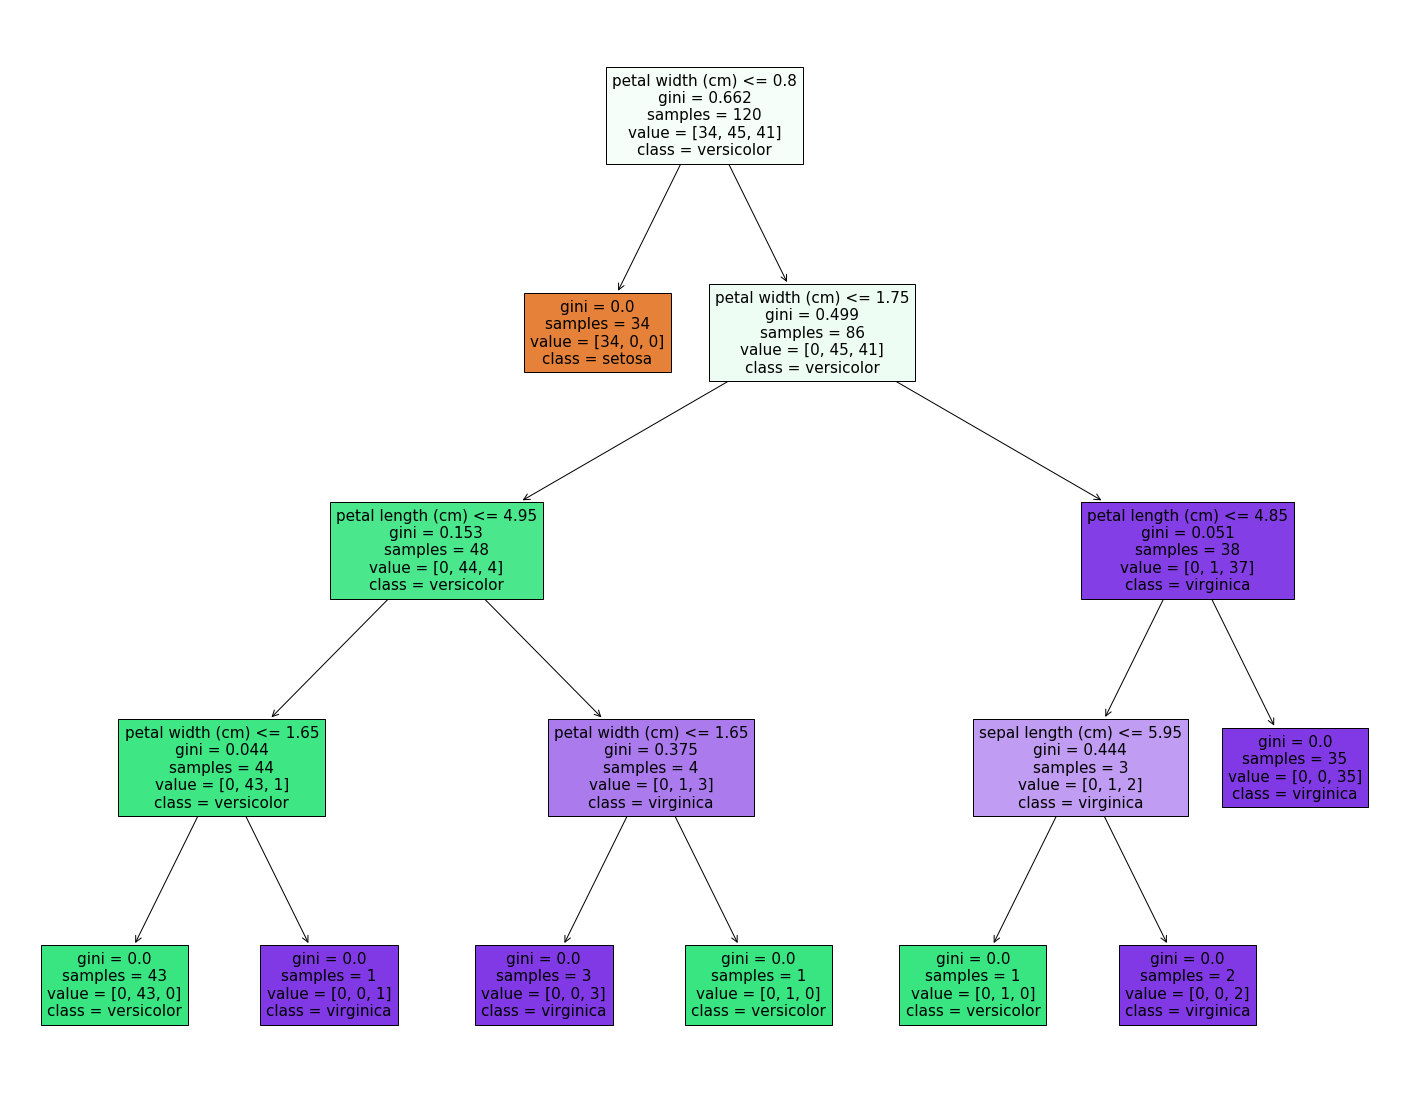

In [13]:
fig = plt.figure(figsize=(25,20))
p = tree.plot_tree(dt_model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

#### Another visualisation of Decision Tree Classifier

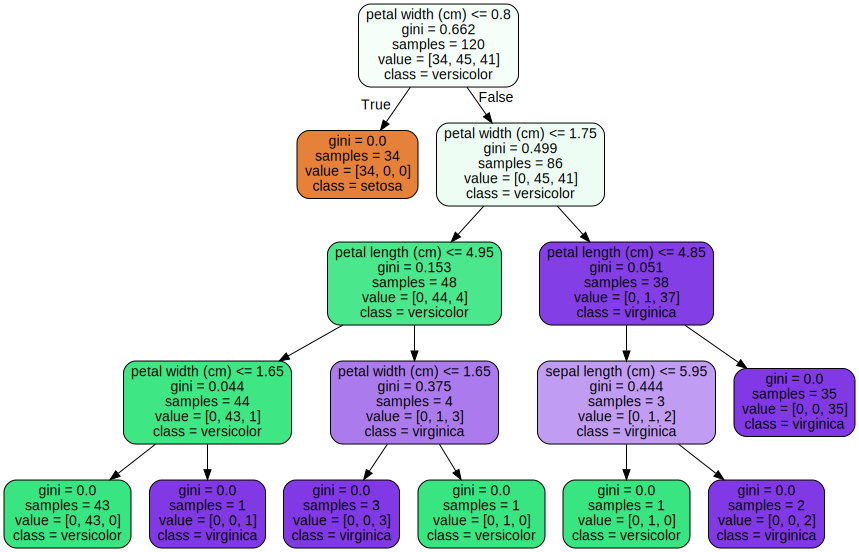

In [14]:
import graphviz

dot_data = tree.export_graphviz(dt_model, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True, rounded = True)


graph = graphviz.Source(dot_data, format="png") 
graph

#### Evaluating our model

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
test_value = np.array([[6. , 2.7, 5.1, 1.6]])
prediction = dt_model.predict(test_value)
print(f"Prediction = {prediction}")

Prediction = [2]


In [17]:
dt_model.classes_

array([0, 1, 2])

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Accuracy

In [26]:
from sklearn.metrics import accuracy_score
pred = dt_model.predict(x_test)
acc = accuracy_score(pred, y_test)

print(f"Accuracy = {round(acc,2)}%")

Accuracy = 0.97%
